In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ML-datasets/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ML-datasets/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Integration

In [ ]:
df = pd.concat([df_train , df_test])
df.shape

(2919, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

Alley
FireplaceQu
PoolQC
Fence
MiscFeature





In [ ]:
#Numeric Feature
int_features = df.select_dtypes(include = 'int64').columns
print(int_features.shape)
print(int_features.tolist())

(26,)
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
#Float Feature
float_features = df.select_dtypes(include = 'float64').columns
print(float_features.shape)
print(float_features.tolist())
#

(12,)
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:
#Categorical Feature
cat_features = df.select_dtypes(include = 'object').columns
print(cat_features.shape)
print(cat_features.tolist())

(43,)
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Get the  Statistical Information of Numerical Feature**

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**Handling Missing Value**

<Axes: >

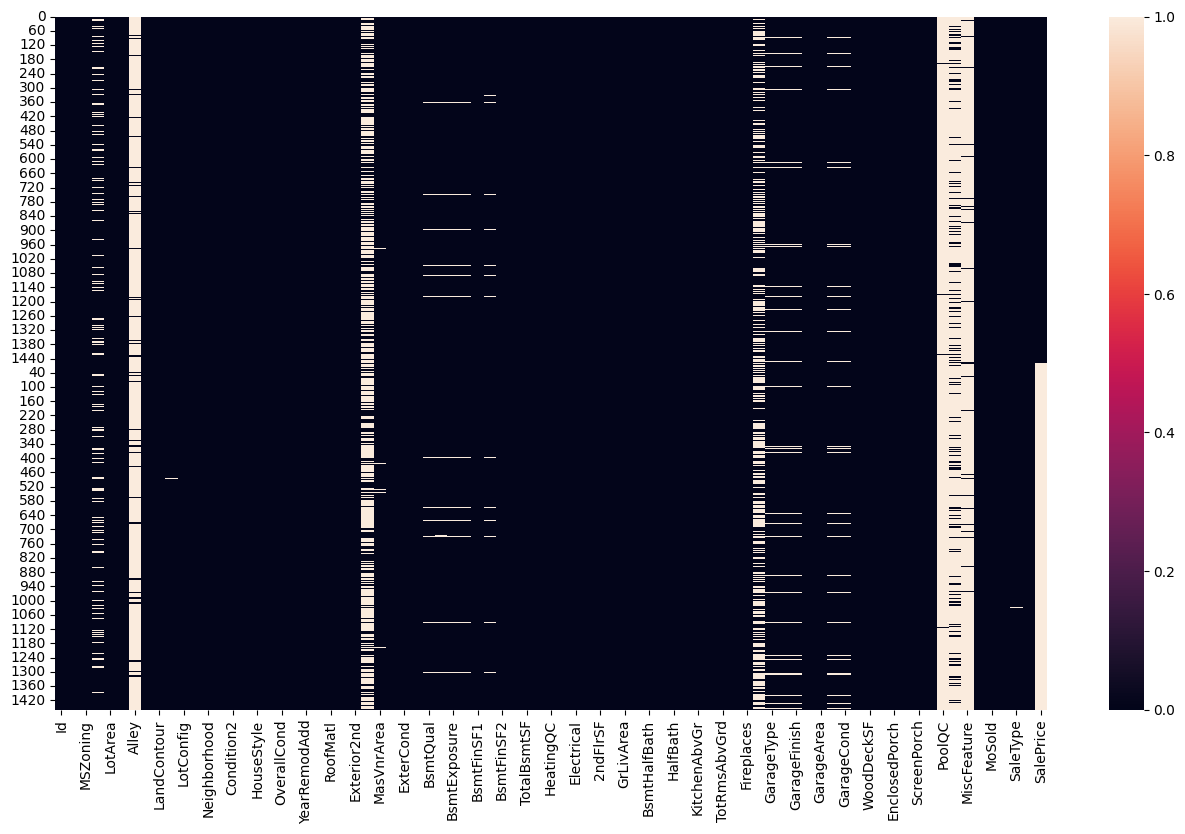

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())


In [ ]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
Alley,2721
LotShape,0
LandContour,0
Utilities,2


In [ ]:
#set index as Id column
df = df.set_index('Id')

In [ ]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

,0
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517
LotConfig,0.000000


Drop Features

In [ ]:
#as per the data description we cannot drop this features as the data can be replaced with NA
miss_value_50_perc = null_percent[null_percent>50]
miss_value_50_perc


,0
Alley,93.216855
MasVnrType,60.500171
PoolQC,99.657417
Fence,80.438506
MiscFeature,96.402878


In [ ]:

miss_value_20_50_perc = null_percent[(null_percent>20) & (null_percent<50)]
miss_value_20_50_perc
#as per the data description we cannot drop this features as the data can be replaced with NA



,0
FireplaceQu,48.646797
SalePrice,49.982871


In [ ]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
miss_value_5_20_perc

,0
LotFrontage,16.649538
GarageType,5.378554
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [ ]:
df['LotFrontage'].value_counts().head()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105


<Axes: ylabel='Id'>

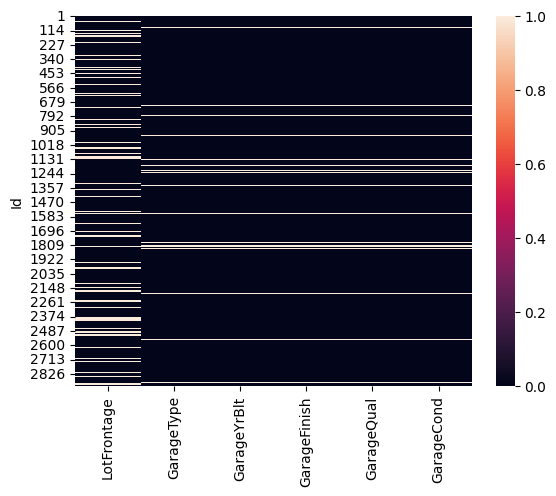

In [ ]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

**Missing Value Imputation**

In [ ]:
missing_value_feat = null_percent[null_percent > 0]
print(missing_value_feat)

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [ ]:
len(missing_value_feat)

35

In [ ]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print(len(cat_na_feat))
print(cat_na_feat)

23
MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64


In [ ]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print(len(int_na_feat))
print(int_na_feat)

0
Series([], dtype: float64)


In [ ]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print(len(float_na_feat))
print(float_na_feat)

12
LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64


MSZoning

In [ ]:
## Handling MSZoning = 0.137033
df['MSZoning'].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


In [ ]:
### Backup of Original Data
df_mvi = df.copy()

In [ ]:
df_mvi['MSZoning'].fillna(df_mvi['MSZoning'].mode()[0], inplace = True)

<ipython-input-111-a522d221e474>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MSZoning'].fillna(df_mvi['MSZoning'].mode()[0], inplace = True)


In [ ]:
df_mvi['MSZoning'].value_counts()

,count
MSZoning,
RL,2269
RM,460
FV,139
RH,26
C (all),25


Alley

In [ ]:
## Handling Alley = 93.216855
df_mvi['Alley'].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [ ]:
df_mvi['Alley'].fillna('NA' , inplace = True)
df_mvi['Alley'].value_counts()

<ipython-input-114-97b93c4229f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Alley'].fillna('NA' , inplace = True)


,count
Alley,
NA,2721
Grvl,120
Pave,78


LotFrontage

In [ ]:
def boxHistPlot(df , figsize=(16,5)):
  plt.figure(figsize = figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.distplot(df)
  plt.show()

<ipython-input-115-d25d142fb3f0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


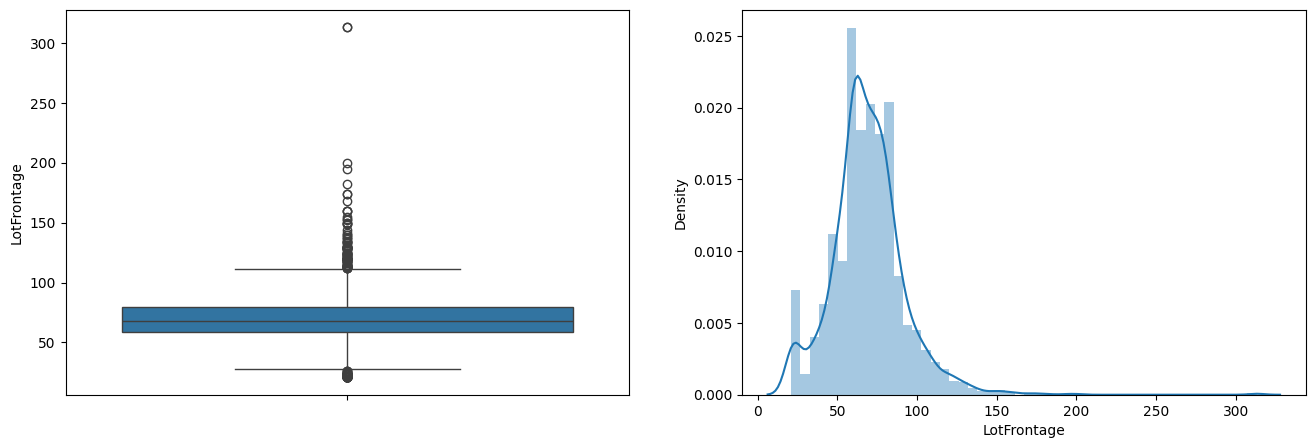

In [ ]:
boxHistPlot(df["LotFrontage"])

In [ ]:
df_mvi['LotFrontage'].fillna(df_mvi['LotFrontage'].median(), inplace = True)
df_mvi['LotFrontage'].isnull().sum()

<ipython-input-117-d8846cd6059c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['LotFrontage'].fillna(df_mvi['LotFrontage'].median(), inplace = True)


0

In [ ]:
def oldNewBoxHistPlot(df , df_new , feature ,figsize=(16,10)):
  plt.figure(figsize = figsize)
  plt.subplot(221)
  sns.boxplot(df[feature])
  plt.title("Old Data Distribution")
  plt.subplot(222)
  sns.distplot(df[feature])
  plt.title("Old Data Distribution")


  plt.subplot(223)
  sns.boxplot(df_new[feature])
  plt.title("New Data Distribution")
  plt.subplot(224)
  sns.distplot(df_new[feature])
  plt.title("New Data Distribution")

  plt.show()

<ipython-input-118-c81140512d5a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-118-c81140512d5a>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


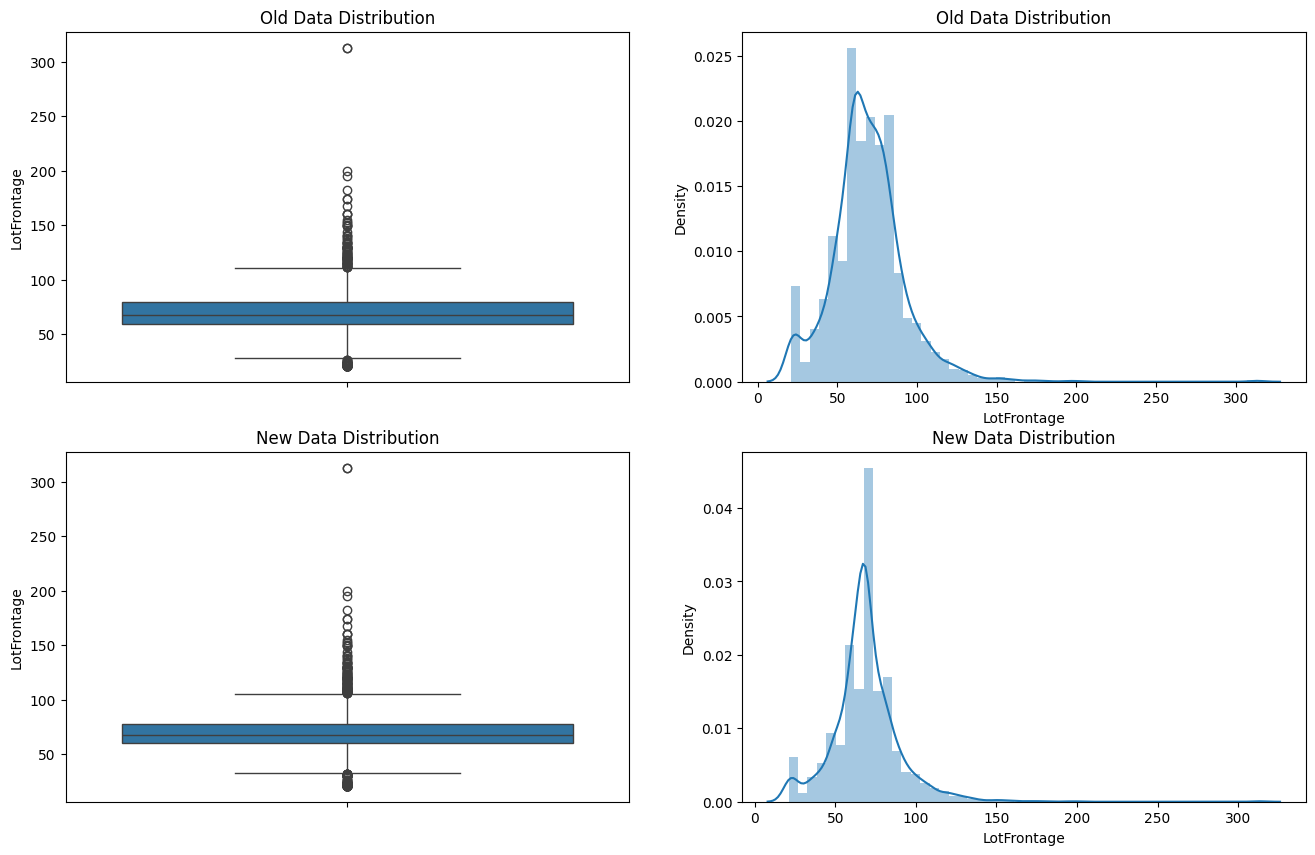

In [ ]:
oldNewBoxHistPlot(df , df_mvi , 'LotFrontage')

Utilities        0.068517

In [ ]:
df['Utilities'].value_counts()

,count
Utilities,
AllPub,2916
NoSeWa,1


In [ ]:
df_mvi['Utilities'].fillna(df_mvi['Utilities'].mode()[0], inplace = True)
df_mvi['Utilities'].isnull().sum()

<ipython-input-121-77fa50e50807>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Utilities'].fillna(df_mvi['Utilities'].mode()[0], inplace = True)


0

Exterior1st      0.034258
Exterior2nd      0.034258

In [ ]:
df['Exterior1st'].value_counts()

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [ ]:
df['Exterior2nd'].value_counts()


,count
Exterior2nd,
VinylSd,1014
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47


In [ ]:
df_mvi['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
df_mvi['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)
df_mvi['Exterior1st'].isnull().sum()
df_mvi['Exterior2nd'].isnull().sum()

<ipython-input-124-094b4ff31716>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
<ipython-input-124-094b4ff31716>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

0

In [ ]:
df_mvi['Exterior2nd'].isnull().sum()

0

MasVnrType      60.500171
MasVnrArea       0.787941

In [ ]:
df['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,879
Stone,249
BrkCmn,25


In [ ]:
df_mvi['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
df['MasVnrType'].isnull().sum()

<ipython-input-127-182cd9c36b3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)


1766

In [ ]:
df_mvi['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrArea'].isnull().sum()

<ipython-input-128-ff6d6239727c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].fillna(0, inplace = True)


23

Cat Feature --->
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665

Numeric Feature --->
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517

In [ ]:
cat_bsmt_feature = ['BsmtQual' , 'BsmtCond' , 'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2']

num_bsmt_feature = ['BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF' , 'TotalBsmtSF' , 'BsmtFullBath' , 'BsmtHalfBath']

<Axes: ylabel='Id'>

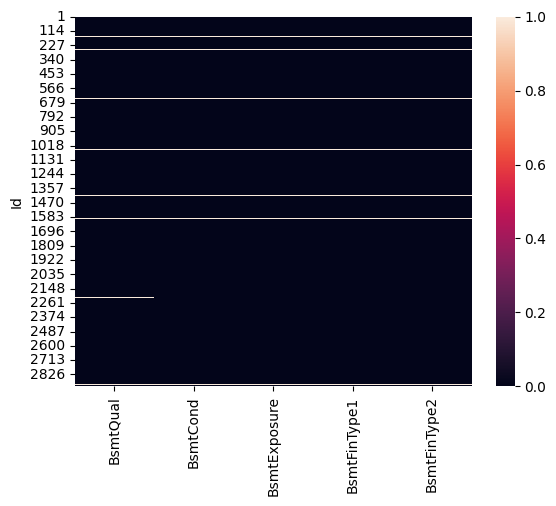

In [ ]:
sns.heatmap(df[cat_bsmt_feature].isnull())

In [ ]:
for feat in cat_bsmt_feature:
  print(df[feat].value_counts())

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [ ]:
for feat in cat_bsmt_feature:
  df_mvi[feat].fillna('NA' , inplace = True)

<ipython-input-132-242d1757fe65>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].fillna('NA' , inplace = True)


In [ ]:
df_mvi[cat_bsmt_feature].isnull().sum()

,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0


<Axes: ylabel='Id'>

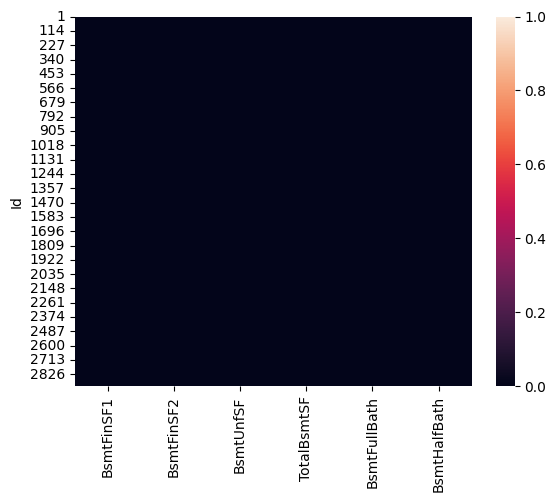

In [ ]:
sns.heatmap(df[num_bsmt_feature].isnull())

In [ ]:
df_bsmt = df[cat_bsmt_feature + num_bsmt_feature]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for feat in num_bsmt_feature:
  df_mvi[feat].fillna(0 , inplace = True)

<ipython-input-136-b4680b1f4029>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].fillna(0 , inplace = True)


In [ ]:
df_mvi[num_bsmt_feature].isnull().sum()

,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


Electrical       0.034258
KitchenQual      0.034258

In [ ]:
print(df['Electrical'].value_counts())
print(df['KitchenQual'].value_counts())

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64
KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64


In [ ]:
df_mvi['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
df_mvi['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)

<ipython-input-139-d6b3ec95c029>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
<ipython-input-139-d6b3ec95c029>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
df_mvi['Functional'].fillna(df['Functional'].mode()[0], inplace = True)
df_mvi['Functional'].isnull().sum()

<ipython-input-140-cdf3a6fe7206>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Functional'].fillna(df['Functional'].mode()[0], inplace = True)


0

In [ ]:
df_mvi['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)
df_mvi['SaleType'].isnull().sum()

<ipython-input-141-25c8c1a2b9d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)


0

In [ ]:
other_cat_feature = ["FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]

for feat in other_cat_feature:
  print(df[feat].value_counts())

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [ ]:
df_mvi['FireplaceQu'].fillna('NA' , inplace = True)
df_mvi['PoolQC'].fillna('NA' , inplace = True)
df_mvi['Fence'].fillna('NA' , inplace = True)
df_mvi['MiscFeature'].fillna('NA' , inplace = True)

<ipython-input-143-a5570ae90e87>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['FireplaceQu'].fillna('NA' , inplace = True)
<ipython-input-143-a5570ae90e87>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258

In [ ]:
num_garage_feature = ['GarageYrBlt' , 'GarageCars' , 'GarageArea']
cat_garage_feature = ['GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond']

df_garage = df[num_garage_feature + cat_garage_feature]
df_garage[df_garage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
for feat in cat_garage_feature:
  df_mvi[feat].fillna('NA' , inplace = True)

df_mvi[cat_garage_feature].isnull().sum()

<ipython-input-145-ed6406dfb4f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].fillna('NA' , inplace = True)


,0
GarageType,0
GarageFinish,0
GarageQual,0
GarageCond,0


In [ ]:
for feat in num_garage_feature:
  df_mvi[feat].fillna(0 , inplace = True)

df_mvi[num_garage_feature].isnull().sum()

<ipython-input-146-1df810ea7636>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].fillna(0 , inplace = True)


,0
GarageYrBlt,0
GarageCars,0
GarageArea,0


In [ ]:
df_mvi.isnull().any(axis=1).sum()

1459

**Convert Numerical Feature to Categorical Feature**

In [ ]:
feature_for_num_conv = ["MSSubClass" , "YearBuilt" , "YearRemodAdd" , "MoSold" , "YrSold" ,"GarageYrBlt" ]

for feat in feature_for_num_conv:
  print(feat , df_mvi[feat].dtype)

MSSubClass int64
YearBuilt int64
YearRemodAdd int64
MoSold int64
YrSold int64
GarageYrBlt float64


In [ ]:
import calendar

In [ ]:
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])


In [ ]:
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [ ]:
for feat in feature_for_num_conv:
  df_mvi[feat] = df_mvi[feat].astype(str)

**Convert Categorical to Numeric**

Ordinal Encoding

In [ ]:
ordinal_end_var = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PaverDrive",
    "Utilities"
]

print(len(ordinal_end_var))

18


In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=["Po" , "Fa" , "TA" ,"Gd" ,"Ex"],ordered=True)).cat.codes

In [ ]:
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [ ]:
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [ ]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

One Hot Encoding

In [ ]:
  df_encod =df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print(len(object_features))
print(object_features)

34
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [ ]:
df_encod['MSZoning'].value_counts()

,count
MSZoning,
RL,2269
RM,460
FV,139
RH,26
C (all),25


In [ ]:
print(df_encod.shape)
df_encod = pd.get_dummies(df_encod , columns = object_features , drop_first = True)
print(df_encod.shape)

(2919, 80)
(2919, 518)


In [ ]:
#checking if object is present
df_encod.select_dtypes(include = 'object').columns.tolist()

[]

**Split Data for Training and Testing**

In [ ]:
print(df_encod.shape)
len_train = df_train.shape[0]
len_test = df_test.shape[0]
print(df_train.shape[0])
print(df_test.shape[0])

(2919, 518)
1460
1459


In [ ]:
X_train = df_encod[:len_train].drop('SalePrice' , axis = 1)
Y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop('SalePrice' , axis = 1)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Building Model**

Cross Validation and Model Selection

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [ ]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knn = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()

In [ ]:
models = {"a":["LinearRegression",lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighborsRegressor",knn],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          }    # Create a dictionary to store the results

In [ ]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import make_scorer , r2_score

def test_model(model , X_train=X_train , Y_train=Y_train):
  cv = KFold(n_splits=3 , shuffle=True , random_state=45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model , X_train , Y_train , cv=cv , scoring=r2)
  score = [r2_val_score.mean()]
  return score

In [ ]:
models_score=[]
for model in models:
    print("Model Name: ",models[model][0])
    score = test_model(models[model][1], X_train, Y_train)
    print("Score of Model:",score)
    print("-----------------------")
    models_score.append([models[model][0],score])

Model Name:  LinearRegression
Score of Model: [0.6085900051743697]
-----------------------
Model Name:  SVR
Score of Model: [-0.051905296835965974]
-----------------------
Model Name:  SGDRegressor
Score of Model: [-17315.749512010854]
-----------------------
Model Name:  KNeighborsRegressor
Score of Model: [0.5440537305483036]
-----------------------
Model Name:  GaussianProcessRegressor
Score of Model: [-5.19426569123911]
-----------------------
Model Name:  DecisionTreeRegressor
Score of Model: [0.7029319082843952]
-----------------------
Model Name:  GradientBoostingRegressor
Score of Model: [0.84333567719825]
-----------------------
Model Name:  RandomForestRegressor
Score of Model: [0.829715345324654]
-----------------------


In [ ]:
models_score

[['LinearRegression', [0.6085900051743697]],
 ['SVR', [-0.051905296835965974]],
 ['SGDRegressor', [-17315.749512010854]],
 ['KNeighborsRegressor', [0.5440537305483036]],
 ['GaussianProcessRegressor', [-5.19426569123911]],
 ['DecisionTreeRegressor', [0.7029319082843952]],
 ['GradientBoostingRegressor', [0.84333567719825]],
 ['RandomForestRegressor', [0.829715345324654]]]

**Model Training**

In [ ]:
gbr.fit(X_train , Y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:

# y_pred # is a numpy array hence we gonna convert it into dataframe
y_pred=pd.concat([df_test['Id'],pd.DataFrame(y_pred,columns=['SalePrice'])],axis=1)
y_pred

,Id,SalePrice
0,1461,124164.864318
1,1462,161526.057456
2,1463,177105.953160
3,1464,183923.849517
4,1465,208074.515009
5,1466,167225.962723
6,1467,161378.430201
7,1468,160111.328280
8,1469,193720.467737
9,1470,127826.651334


In [ ]:
y_pred.to_csv("/content/drive/MyDrive/ML-datasets/house-prices-advanced-regression-techniques/results.csv",index=False)

In [ ]:
#storing model in pickle file
import pickle

with open('gbr.pkl','wb') as f:
    pickle.dump(gbr,f)